## Connect with Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Move to located folder

In [ ]:
%cd /content/drive/MyDrive/MachineLearningProject/CrowdedObjectsCounting/HoneyBeesCounting

/content/drive/MyDrive/MachineLearningProject/CrowdedObjectsCounting/HoneyBeesCounting


In [ ]:
!ls

 Bees-Dataset-With-Maps
 Bees-Dataset-With-Maps-20210210T113744Z-001.zip
'Bees-Dataset-With-Maps-20210210T113744Z-001.zip (Unzipped Files)'
 BeesVisualisations.ipynb
 helping_module
 label_postprocessing.ipynb
 making_densitymaps.ipynb
 TrainModel


In [ ]:
# To delete
'''
import os
import shutil
files=os.listdir()
for file in files:
  if file.endswith('.json'):
    shutil.move(file,'PathsToData/')
'''

"\nimport os\nimport shutil\nfiles=os.listdir()\nfor file in files:\n  if file.endswith('.json'):\n    shutil.move(file,'PathsToData/')\n"

# Importing the libararies

In [ ]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter
import scipy
import scipy.spatial
import json
import torchvision.transforms.functional as F
from image import *
from helping_module.mymodel import CSRNet
import torch
%matplotlib inline

In [ ]:
#from utils import *
from helping_module.mydataset import *

In [ ]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
device='cpu'

In [ ]:
from torchvision import datasets, transforms
trans=transforms.Compose([
                       transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225]),
                   ])

### Loding the trained model

In [ ]:
model = CSRNet()
model=model.to(device)
checkpoint_3 = torch.load('/content/drive/MyDrive/MachineLearningProject/CrowdedObjectsCounting/HoneyBeesCounting/TrainModel/0checkpoint.pth.tar',map_location='cpu')


model.load_state_dict(checkpoint_3['state_dict'])

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


<All keys matched successfully>

In [ ]:
img=Image.open('/content/drive/MyDrive/MachineLearningProject/CrowdedObjectsCounting/HoneyBeesCounting/BeesDatasets/test/images/1281_01_01.png')
gt=h5py.File('/content/drive/MyDrive/MachineLearningProject/CrowdedObjectsCounting/HoneyBeesCounting/BeesDatasets/test/ground-truth-h5/1281_01_01.h5')
gt=np.asarray(gt['density'])

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
img_size=img.size

In [ ]:
img_transformed=trans(img)
img_transformed=img_transformed.to(device)
img_output=model(img_transformed.unsqueeze(0))

In [ ]:
output_x=torch.nn.functional.interpolate(img_output,size=(img_size[1],img_size[0]))
output_detached=output_x.detach().cpu().numpy()
output_detached=output_detached.squeeze(0).squeeze(0)
clipped_out=np.where(output_detached<0.005,0,output_detached)

<Figure size 1000x1000 with 0 Axes>

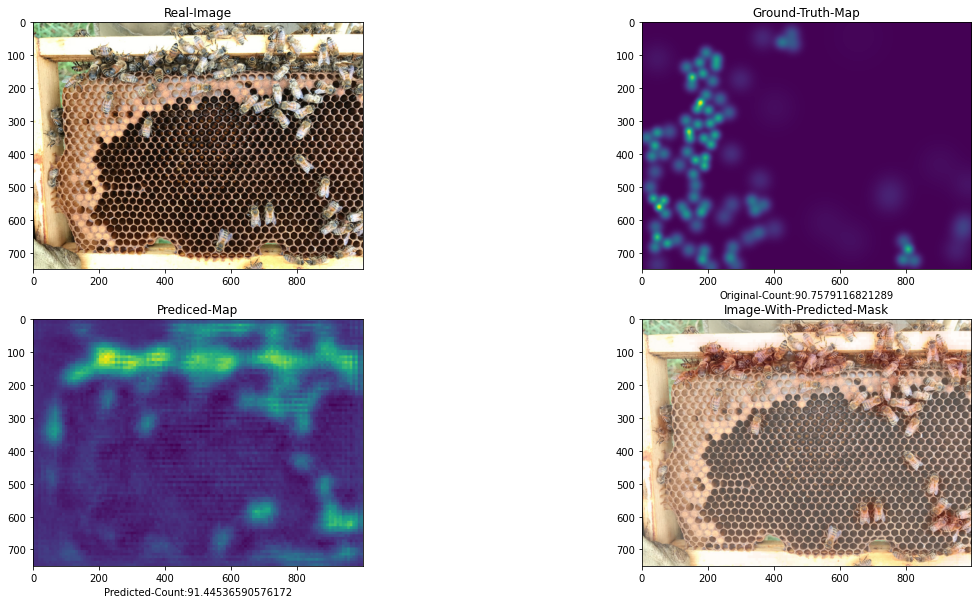

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)

plt.figure(figsize=(10,10),dpi=100)

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(2,2)

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0][0].imshow(img)
axarr[0][0].set_title('Real-Image')
axarr[0][1].imshow(gt)
axarr[0][1].set_title('Ground-Truth-Map')
axarr[0][1].set_xlabel('Original-Count:{}'.format(gt.sum()))


axarr[1][0].imshow(output_detached)
axarr[1][0].set_title('Prediced-Map')
axarr[1][0].set_xlabel('Predicted-Count:{}'.format(img_output.detach().sum()))

axarr[1][1].imshow(img)
axarr[1][1].set_title('Image-With-Predicted-Mask')
axarr[1][1].imshow(clipped_out,cmap='Reds',alpha=0.3)


plt.show()

## If there are no corresponding density-maps as ground-truth

<Figure size 1000x1000 with 0 Axes>

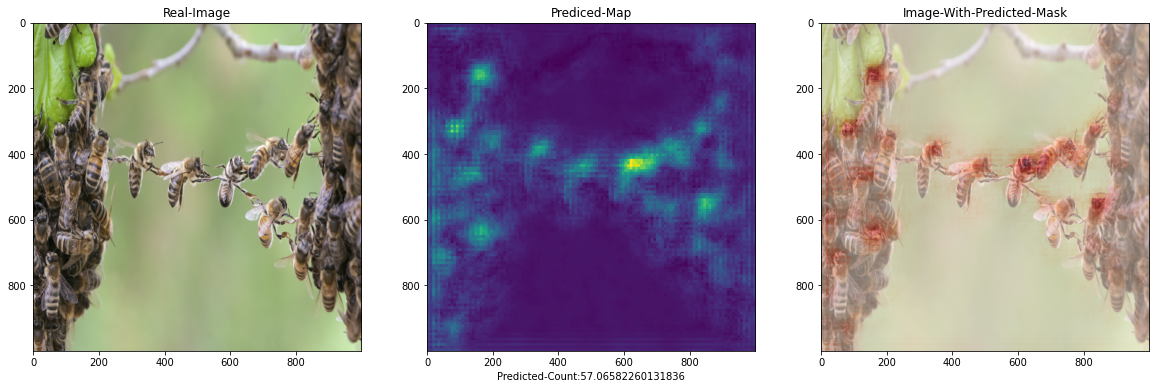

In [ ]:
unseen_img=Image.open('UnseenImages/very_high_res.jpg')
unseen_img=unseen_img.resize(size=(1000,1000))
img=unseen_img
img_size=img.size
img_transformed=trans(img)
img_transformed=img_transformed.to(device)
img_output=model(img_transformed.unsqueeze(0))

output_x=torch.nn.functional.interpolate(img_output,size=(img_size[1],img_size[0]))
output_detached=output_x.detach().cpu().numpy()
output_detached=output_detached.squeeze(0).squeeze(0)
clipped_out=np.where(output_detached<0.0005,0,output_detached)

plt.rcParams["figure.figsize"] = (20,10)

plt.figure(figsize=(10,10),dpi=100)

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,3)

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(img)
axarr[0].set_title('Real-Image')

axarr[1].imshow(output_detached)
axarr[1].set_title('Prediced-Map')
axarr[1].set_xlabel('Predicted-Count:{}'.format(img_output.detach().sum()))

axarr[2].imshow(img)
axarr[2].set_title('Image-With-Predicted-Mask')
axarr[2].imshow(clipped_out,cmap='Reds',alpha=0.5)


plt.show()


<Figure size 1000x1000 with 0 Axes>

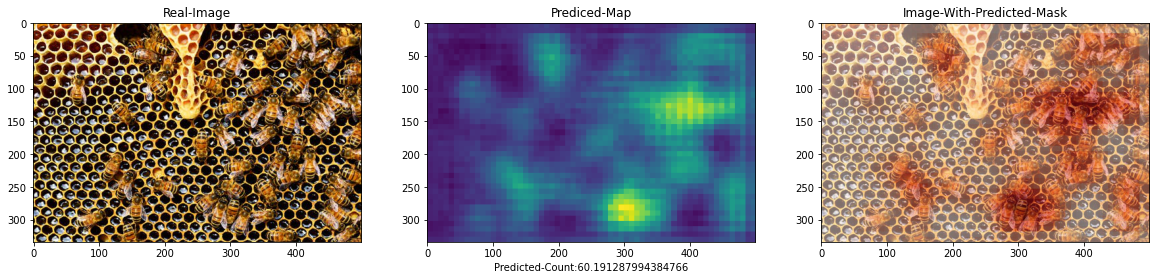

In [ ]:
unseen_img=Image.open('UnseenImages/mid_res_0.jpg')
#unseen_img=unseen_img.resize(size=(1000,1000))
img=unseen_img
img_size=img.size
img_transformed=trans(img)
img_transformed=img_transformed.to(device)
img_output=model(img_transformed.unsqueeze(0))

output_x=torch.nn.functional.interpolate(img_output,size=(img_size[1],img_size[0]))
output_detached=output_x.detach().cpu().numpy()
output_detached=output_detached.squeeze(0).squeeze(0)
clipped_out=np.where(output_detached<0.0023,0,output_detached)

plt.rcParams["figure.figsize"] = (20,10)

plt.figure(figsize=(10,10),dpi=100)

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,3)

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(img)
axarr[0].set_title('Real-Image')

axarr[1].imshow(output_detached)
axarr[1].set_title('Prediced-Map')
axarr[1].set_xlabel('Predicted-Count:{}'.format(img_output.detach().sum()))

axarr[2].imshow(img)
axarr[2].set_title('Image-With-Predicted-Mask')
axarr[2].imshow(clipped_out,cmap='Reds',alpha=0.5)


plt.show()


In [ ]:

print(output_detached.max())
print(output_detached.min())
print(output_detached.mean())

0.085903995
-0.0010930034
0.023652283


<Figure size 1000x1000 with 0 Axes>

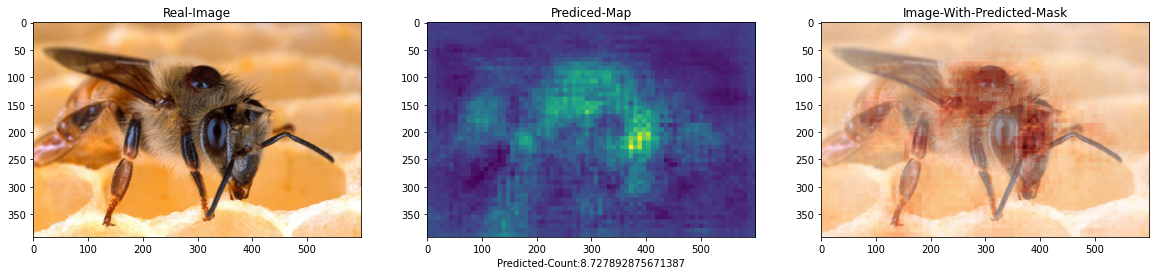

In [ ]:
unseen_img=Image.open('UnseenImages/high_03.jpg')
#unseen_img=unseen_img.resize(size=(1000,1000))
img=unseen_img
img_size=img.size
img_transformed=trans(img)
img_transformed=img_transformed.to(device)
img_output=model(img_transformed.unsqueeze(0))

output_x=torch.nn.functional.interpolate(img_output,size=(img_size[1],img_size[0]))
output_detached=output_x.detach().cpu().numpy()
output_detached=output_detached.squeeze(0).squeeze(0)
clipped_out=np.where(output_detached<0.0005,0,output_detached)

plt.rcParams["figure.figsize"] = (20,10)

plt.figure(figsize=(10,10),dpi=100)

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,3)

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(img)
axarr[0].set_title('Real-Image')

axarr[1].imshow(output_detached)
axarr[1].set_title('Prediced-Map')
axarr[1].set_xlabel('Predicted-Count:{}'.format(img_output.detach().sum()))

axarr[2].imshow(img)
axarr[2].set_title('Image-With-Predicted-Mask')
axarr[2].imshow(clipped_out,cmap='Reds',alpha=0.5)


plt.show()


# So in the above example we can see, that our model has done an amazing job at triggering the right features, but as the count is the sum of the pixel values, so we are getting a large number.

<Figure size 1000x1000 with 0 Axes>

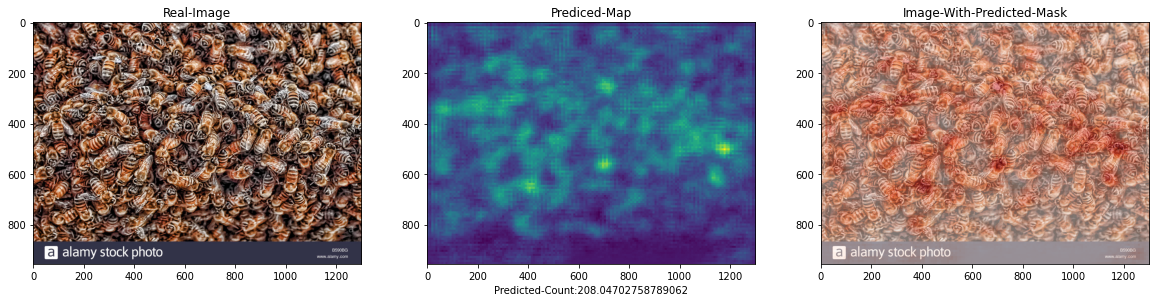

In [ ]:
unseen_img=Image.open('UnseenImages/high_02.jpg')
#unseen_img=unseen_img.resize(size=(1000,1000))
img=unseen_img
img_size=img.size
img_transformed=trans(img)
img_transformed=img_transformed.to(device)
img_output=model(img_transformed.unsqueeze(0))

output_x=torch.nn.functional.interpolate(img_output,size=(img_size[1],img_size[0]))
output_detached=output_x.detach().cpu().numpy()
output_detached=output_detached.squeeze(0).squeeze(0)
clipped_out=np.where(output_detached<0.0005,0,output_detached)

plt.rcParams["figure.figsize"] = (20,10)

plt.figure(figsize=(10,10),dpi=100)

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,3)

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(img)
axarr[0].set_title('Real-Image')

axarr[1].imshow(output_detached)
axarr[1].set_title('Prediced-Map')
axarr[1].set_xlabel('Predicted-Count:{}'.format(img_output.detach().sum()))

axarr[2].imshow(img)
axarr[2].set_title('Image-With-Predicted-Mask')
axarr[2].imshow(clipped_out,cmap='Reds',alpha=0.5)


plt.show()
